dataset link :https://www.kaggle.com/code/kmalit/bank-customer-churn-prediction/data

#### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Variables:
RowNumber — corresponds to the record (row) number and has no effect on the output. This column will be removed.

CustomerId — contains random values and has no effect on customer leaving the bank. This column will be removed.

Surname — the surname of a customer has no impact on their decision to leave the bank. This column will be removed.

CreditScore — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

Geography — a customer’s location can affect their decision to leave the bank. This column will be removed.

Gender — it’s interesting to explore whether gender plays a role in a customer leaving the bank. We’ll include this column, too.

Age — this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

Tenure — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

Balance — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

NumOfProducts — refers to the number of products that a customer has purchased through the bank.

HasCrCard — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank. (0=No,1=Yes)

IsActiveMember — active customers are less likely to leave the bank, so we’ll keep this. (0=No,1=Yes)

EstimatedSalary — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

Exited — whether or not the customer left the bank. This is what we have to predict. (0=No,1=Yes)

#### Data cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


It consists of 10000 observations and 12 variables. Independent variables contain information about customers. Dependent variable refers to customer abandonment status.

In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No Null values in Given Dataset.

In [5]:
df.duplicated().sum()

0

 No duplicate values available

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<Axes: >

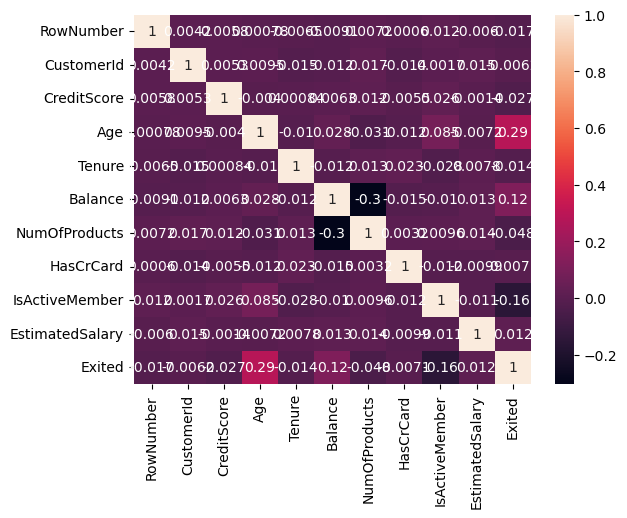

In [7]:
sns.heatmap(df.corr(),annot=True)

By seeing above chart it seens that, 
1.'Age' is positively correlate to Target column.
2.'IsActiveMember' is negatively correlate to Target column.
3.'Balance' is slight positively correlate to target column.
#### So it concludes that this three features mostly affects on Our predictions that the cutomer is Churn or Not.


In [8]:
x = df.drop('Exited', axis=1)
y = df['Exited']

In [9]:
col=x.select_dtypes(['int64','float64']).columns
col
from scipy.stats import skew
for i in x[col]:
    print(i)
    print(skew(x[i]))
    plt.show()

RowNumber
0.0
CustomerId
0.001148973521486491
CreditScore
-0.07159586676212397
Age
1.0111685586628079
Tenure
0.010989809189781041
Balance
-0.14108754375291138
NumOfProducts
0.745456048438949
HasCrCard
-0.9016763178640548
IsActiveMember
-0.06042756246298516
EstimatedSalary
0.0020850448448748848


In [10]:
num_col=df.select_dtypes(['int','float'])

In [11]:
num_col

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52,1


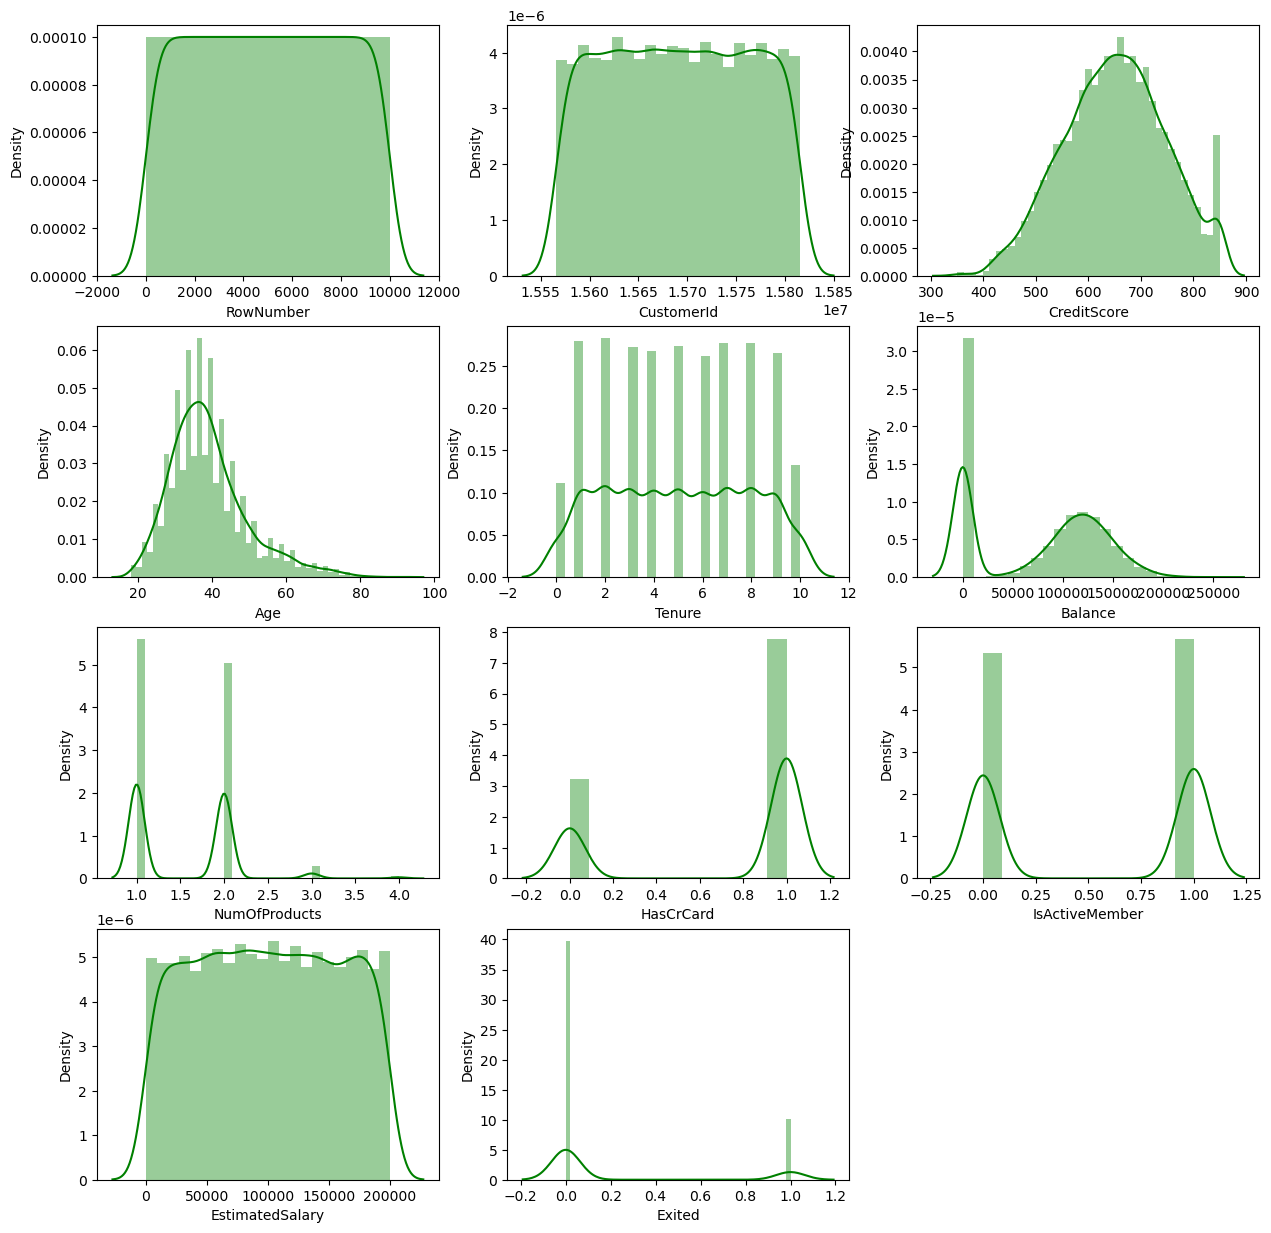

In [12]:
plt.figure(figsize= (15,15))
count=1
for i in num_col:
    
    plt.subplot(4,3,count)
    sns.distplot(num_col[i],color='green')
    count+=1
plt.show()

By above visualization it seens that 'Balance' Left Skewed and 'Age'is Right Skewed so need to remove skewness of Both columns.

In [13]:
x['Balance']=np.log(x['Balance'])

In [14]:
x['Age']=np.log(x['Age'])

In [15]:
col=x.select_dtypes(['int64','float64']).columns
col
from scipy.stats import skew
for i in x[col]:
    print(i)
    print(skew(x[i]))
    plt.show()

RowNumber
0.0
CustomerId
0.001148973521486491
CreditScore
-0.07159586676212397
Age
0.18199280840499774
Tenure
0.010989809189781041
Balance
nan
NumOfProducts
0.745456048438949
HasCrCard
-0.9016763178640548
IsActiveMember
-0.06042756246298516
EstimatedSalary
0.0020850448448748848


#### Now there is no skewness in our features.

#### Here we drop the features which does not affects on our model performance.

In [16]:
df.drop(['Surname','Geography','Gender','CustomerId','RowNumber'],axis=1,inplace=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


#### Now in our dataet there is no any categorical value so that do  not Need to do Encoding.

#### Visualization on Target Column

0    7963
1    2037
Name: Exited, dtype: int64


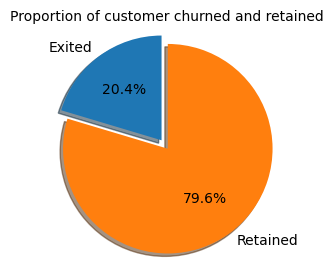

In [17]:
print(df.Exited.value_counts())
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(3,3))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 10)
plt.show()

#### From above observation, aproximate 80% (7063 nos.) customers are continue with the bank as a member

### feature scaling

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[['CreditScore','Age','Balance','EstimatedSalary']] = sc.fit_transform(df[['CreditScore','Age','Balance','EstimatedSalary']])
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,0.293517,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,0.198164,1,0.117350,1,0,1,0.216534,0
2,-1.536794,0.293517,8,1.333053,3,1,0,0.240687,1
3,0.501521,0.007457,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,0.388871,2,0.785728,1,1,1,-0.365276,0


#### making data balanced by Oversampling and Spliting dataset into x & y

In [19]:
from imblearn.over_sampling import SMOTE
sm =SMOTE(random_state=42)
x = df.drop('Exited', axis=1)
y = df['Exited']
x,y = sm.fit_resample(x,y)
x.shape,y.shape

((15926, 8), (15926,))

We use Scaling for standardization

<Axes: xlabel='Exited', ylabel='count'>

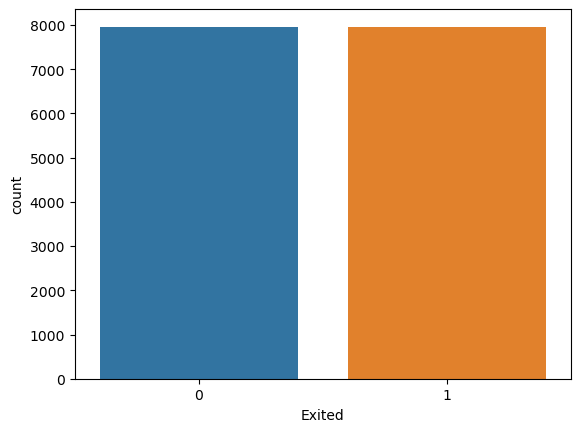

In [20]:
sns.countplot(x=y)

Now Our Data is balanced as shown above graph

In [21]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0.293517,2,-1.225848,1,1,1,0.021886
1,-0.440036,0.198164,1,0.117350,1,0,1,0.216534
2,-1.536794,0.293517,8,1.333053,3,1,0,0.240687
3,0.501521,0.007457,1,-1.225848,2,0,0,-0.108918
4,2.063884,0.388871,2,0.785728,1,1,1,-0.365276


#### Spliting x & y into training and testing

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =train_test_split(x,y,test_size=0.3,random_state=1)

In [23]:
from sklearn.metrics import classification_report,accuracy_score

In [25]:
def mymodel(model):
    model.fit(xtrain,ytrain) # build model
    ypred = model.predict(xtest) #predicted value of y
    train = model.score(xtrain,ytrain)
    test = model.score(xtest,ytest)
    print(f'training accuracy {train}')
    print(f'testing accuracy {test}')
    print(f'Model Name : {model}')
    print(classification_report(ytest,ypred))

#### Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)
cr = classification_report(ytest,ypred)
train = rf.score(xtrain,ytrain)
test = rf.score(xtest,ytest)
print(f'training accuracy {train}')
print(f'testing accuracy {test}')
print(cr)

training accuracy 1.0
testing accuracy 0.8729593972373378
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2322
           1       0.87      0.88      0.88      2456

    accuracy                           0.87      4778
   macro avg       0.87      0.87      0.87      4778
weighted avg       0.87      0.87      0.87      4778



Our Model works best on Random Forest i.e. accuracy 84% as compared to others. So we'll take Random Forest for our predictions.